# Import Libraries

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [9]:
dataset = pd.read_csv("Titanic-Dataset.csv")

In [10]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Checking for NULL values

In [11]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Visualizations 

### Plot of survivors vs Non-survivors gender-wise

<Axes: xlabel='Survived', ylabel='count'>

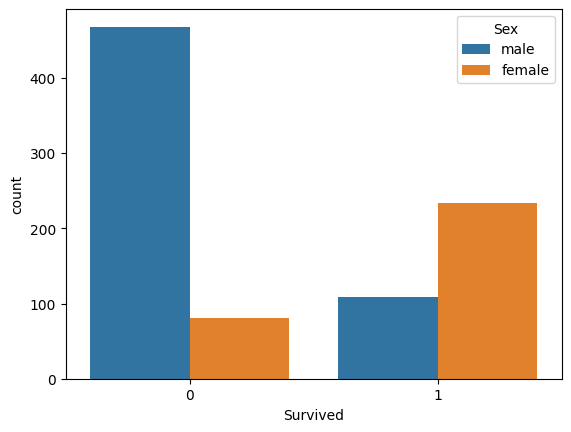

In [12]:
sns.countplot(x='Survived',data=dataset,hue = 'Sex')

##### The number of female survivors are greater than the number of male survivors. Also, the numer of men who did not survive is also almost 4 times greater than the women who didn't.  

### Plot of survivors vs Non-survivors ticket-class wise

The different types of classes of tickets are: ['3' '1' '2']
The number of people in Class 3 tickets = 491
The number of people in Class 2 tickets = 184
The number of people in Class 1 tickets = 216


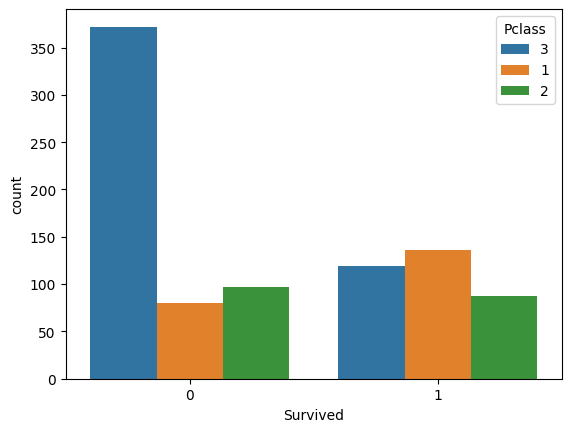

In [13]:
dataset['Pclass'] = dataset['Pclass'].astype(str)
dataset['Survived'] = dataset['Survived'].astype(str)
sns.countplot(x='Survived',data=dataset, hue='Pclass')
print(f"The different types of classes of tickets are: {dataset['Pclass'].unique()}")
print(f"The number of people in Class 3 tickets = {dataset['Pclass'].value_counts()['3']}")
print(f"The number of people in Class 2 tickets = {dataset['Pclass'].value_counts()['2']}")
print(f"The number of people in Class 1 tickets = {dataset['Pclass'].value_counts()['1']}")

##### We can see that a lot of people who travelled by a Class 3 tikcket havent survived this could be due to the fact that the number of Class 3 tickets were higher in comparison to the other types. 

# NULL VALUE TREATMENT

##### We shall replace all the null values in column Cabin with a custom value 'YO', in embarked with the mode value and for age, we can find the median of the age with pclass and age as parameters.

In [14]:
dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace = True)
dataset.Cabin = dataset.Cabin.fillna('YO')    
grp = dataset.groupby(['Sex', 'Pclass'])
dataset['Age'] = grp['Age'].transform(lambda x: x.fillna(x.median()))
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,YO,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,YO,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,YO,Q


In [15]:
print(f"NULL VALUES REMAINING: {dataset.isna().sum()}") 
print(f"Overall: {dataset.isna().sum().sum()}")

NULL VALUES REMAINING: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Overall: 0


# Outlier Detetction

skewness value of Fare:  4.787316519674893


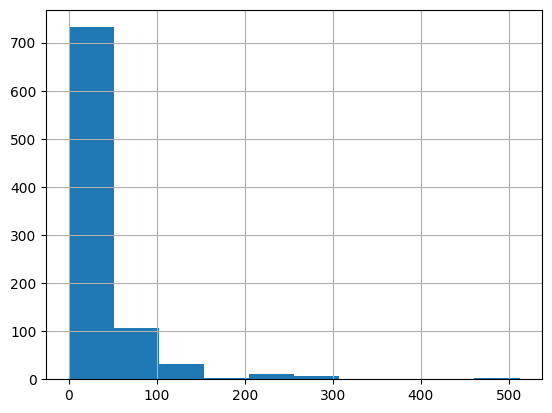

In [16]:
dataset['Fare'].hist()
print('skewness value of Fare: ',dataset['Fare'].skew())

##### Clearly, we can see that the data is skewed towards left, indicating outliers.<br>Also, the skewness value is also not in the range [-1,1] which indicates that the distribution is not normal and hence has outliers.

# Splitting dependent and independent variables

In [17]:
X = dataset.drop('Survived', axis=1)  # Independent variables
y = dataset['Survived']  # Dependent variable
display(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object

# Encoding

##### We shall use one-hot encoding for the Sex column

In [18]:
X_encoded = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Feature Scaling

##### We use Standard Scaler to scale the age column

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_encoded['Age'] = scaler.fit_transform(X_encoded[['Age']])
display(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,YO,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,YO,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,YO,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,YO,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,YO,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
